# Forecasting
Predicting the future. We will work with a business scenario where we need to make decisions based off of predictions (in Customer Demand). <br>
We will be using Data-Science tools in order predict (tools like <i>Linear Regression</i>)

# Predicting Customer Demand
We are going to look at the data from a Car Dealership company in Quebec, Canada. The company follows a standard business model in which, every month they buy a certain number of cars from the manufacturer at a lower price and send it to their individual customers at a higher price. With respect to company's vision and growth agenda, we need to figure out (predict/forecast) the customer demand in upcoming months. Buying too many cars can result in problems in cash flow, increase in maintenance and storage costs and on the other hand buying less cars can cause a failure in meeting the customers demand. <br>

There are several proven quantitative methods that can be used for prediction. One of them is <b><i>Linear Regression</i><b>. We will be using the past data to predict future data to learn the number of cars we need to order.

## Step 0 - Data Preparation/Cleaning (Cleaning Erroneous Data)
First we will start off by reading and understanding the data. <br>
The data consists of a car company's sales record for consecutive 108 Months (9Years).

In [7]:
import pandas as pd
df = pd.read_csv('carsales.csv')
 #The name of the second column can be shortened

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [8]:
df.columns = ['month', 'sales'] #Accessing the columns and redefining them with shorter names.
df.head()

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [10]:
df.tail() #108 contains NaN (Not a Number) which is unnecessary for qualitative analysis.

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [13]:
df.shape

(109, 2)

# General Workflow to find NaN Values

1) df.isna().sum()
2) df.dropna()
3) 1) to verify.

In [18]:
df = df.dropna()
df.isna().sum()
df.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [19]:
df.dtypes

month     object
sales    float64
dtype: object

### NOTE -
We need numbers to perform quantitative methods on the dataset, Although there are number of ways to change that. Since, we are performing a Linear Regression at the moment and the nature of our data is chronological, coherent. We can simply add a period column which refers to each year/month. <br>
and with this we finish the process of <b><i>Data Cleaning</i></b> in this dataset.

In [20]:
df['period'] = list(range(108))

## Plotting to find Trends 

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns

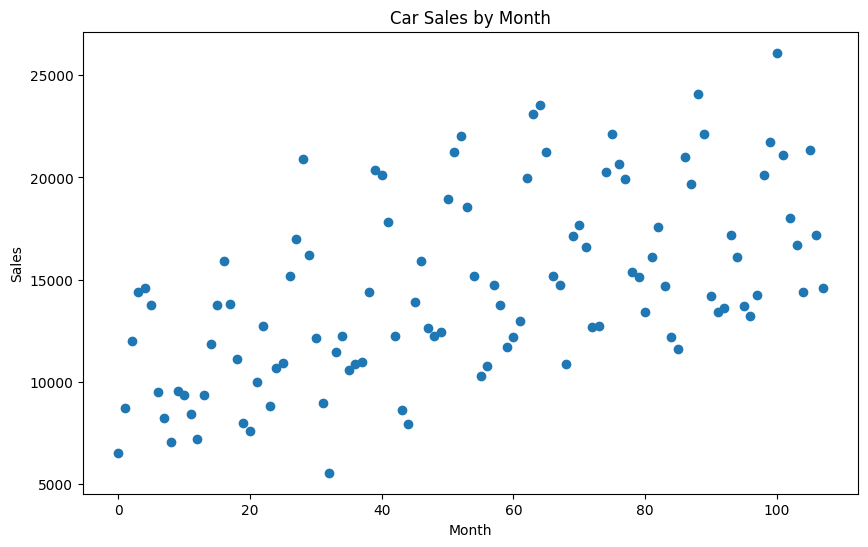

In [37]:
plt.figure(figsize = (10,6))
plt.scatter(df['period'],df['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

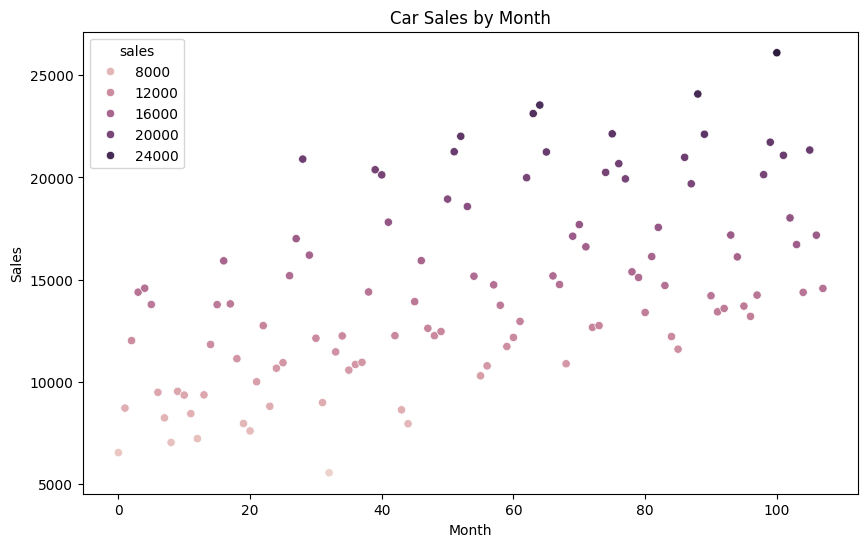

In [38]:
#The one i made -
plt.figure(figsize = (10,6))
sns.scatterplot(df, x= df['period'], y = df['sales'], hue = 'sales')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Performing Linear Regression
Linear Regression is a method which is used to find the relationship between a dependent variable and one or more independent variables by modelling it in a straight line. <br>
The most common thing in this pattern is the gradual increase from <b>Left</b> to <b>Right</b>. <br>
<i>Linear Regression allows us to pull order from the chaos</i> <br>
The chaos here are the car sales in Quebec, where seasonal variations, time trends and randomness mingle together in a noisy dataset.  <br>
1) As we remove the randomness between the relation of two variable, the regression line show us the general trend. <br>
2) We often say that the regression line <i>fits the data</i> when the line goes from between the cloud of data. <br>

## Code Guideline(s) - 
The methods we use for Linear Regression are very particular about the shape of the data, Here particularly the code would run smoother if our data is stored in the shape of 108 Rows of 1 List each. <br>
We use the function reshape()

In [39]:
df['sales']

0       6550.0
1       8728.0
2      12026.0
3      14395.0
4      14587.0
        ...   
103    16722.0
104    14385.0
105    21342.0
106    17180.0
107    14577.0
Name: sales, Length: 108, dtype: float64

In [41]:
x = df['period'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [43]:
#We can perform Linear Regression from the right module.
from sklearn.linear_model import LinearRegression

In [46]:
regressor = LinearRegression()
regressor.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### StepsAbove^
We import Linear Regression capability from scikit-learn package (sklearn). It provides numerous Machine-Learning capabilities, <i>Linear Regression</i> is one of them. <br>
<b><i>Fit()</i></b> function - We are telling it to calculate a line which FITS the data by matching its location and general trend. <br>
A quantitative way to describe it would be, what <i>really fits our regression</i>, determining precise and optimized values for two numbers : A coefficient and an intercept. After running the preceding snippet, we can look at the numbers as follows -
regressor.coef_
regressor.intercept_

# # Applying Algebra and Linear Regression 
Linear Regression is a method used to find the best-fitting line for a set of data. The line summarizes the general trend <br>
The function fit(x,y) returns two variables, coefficient and intercept. <br>
Coefficient → slope of the line (m) [.coef_] <br>
Intercept → starting height of the line (b) [.intercept_] <br> 
Intercept is the value of y, when x = 0  [Where the line crosses the y-axis] <br>
## Pointers -
<i> We can also think of every point on that line as a prediction of how many car sales are expected at each time period, ignoring the randomness and noise. </i> <br>
## Interpretations -
The interpretation of line slope, 81.2. Is the monthly growth trend of car sales, We conclude that the car sales grow about 81.2 Cars/Month. Despite the randomness, Growth of 81.2 remains. <br>

--

Now even though the line looks fine but its natural to wonder how out regressor determined the values 81.2 and 10250.8. Therefore, this is not the only line that we can draw over our cloud of points. A literal infinite amount of lines can pass through our cloud of data. Example - We might hypothesize that the following line is a better approximation of the relationship between sales and timeperiod. <br>
<center><i>sales = 125. x + 8000</i></center> <br> 
This is a <b><i>Hypothesized Line</i></b>. If we use it to model our data, we have a new <i>m</i> and <i>b</i>. Now lets plot our regression line and hypothesized line together.


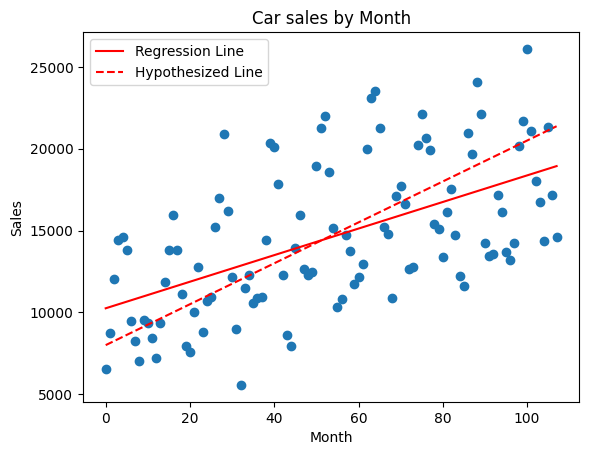

In [69]:
plt.scatter(df['period'], df['sales'])
plt.plot(df['period'], [81.2 * i + 10250.8 for i in df['period']], 'r-', label = 'Regression Line')
plt.plot(df['period'], [125 * i + 8000 for i in df['period']], 'r--', label = 'Hypothesized Line')
plt.legend(loc = "upper left")
plt.title("Car sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4
...,...,...,...
103,1968-08,16722.0,103
104,1968-09,14385.0,104
105,1968-10,21342.0,105
106,1968-11,17180.0,106


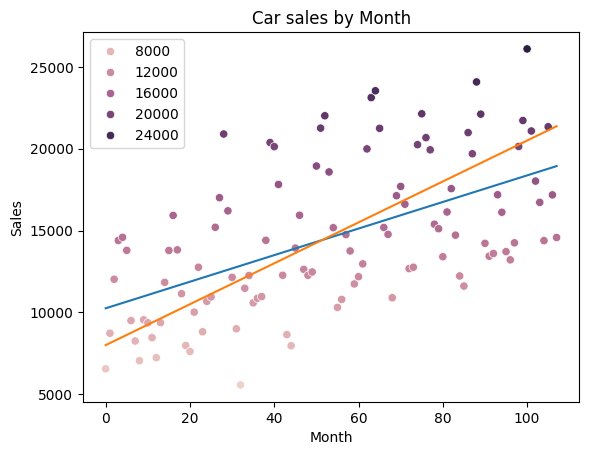

In [78]:
#Plotting the same with seaborn-
sns.scatterplot(df,x = df['period'], y = df['sales'], hue= 'sales')
sns.lineplot(df, x = df['period'], y= [81.2 * i + 10250.8 for i in df['period']])
sns.lineplot(df, x = df['period'], y= [125 * i + 8000 for i in df['period']])
plt.title("Car sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## NOTE - 
Given both lines show a reasonable upward trend and both could be said to be fit for the data. Why does our regressor fit produces only one output(line)? <br>
<b>Because</b> the regression line output by the linear regression process is supposedly the <i>line of best fit</i>. <br>
<b>BUT</b> What enables us to say that it fits better than any <i>other line</i>?

# Calculating Error Measurements 